### Customizing Plots with utils.plot_helper

In [1]:
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt

from shutil import rmtree

root_path = os.path.join(Path().resolve().parent.parent)
package_path = os.path.abspath(os.path.join(root_path, "hamageolib"))
test_fixture_path = os.path.join(root_path, "tests", "integration", "fixtures")
result_path = os.path.join(Path().resolve(), "results")

if str(package_path) not in sys.path:
    sys.path.insert(0, str(package_path))

if not os.path.isdir(result_path):
    os.mkdir(result_path)

import utils.plot_helper as plot_helper

### Example: Customizing Matplotlib Plots with Scaling

This example demonstrates how to customize Matplotlib plots by scaling various plot parameters, such as font size, line width, and tick intervals. The process includes retrieving the default color cycle, applying scaling factors, and fine-tuning axis limits and grid settings.

#### Key Steps:
1. **Retrieve Default Colors**:
   - Extract the default Matplotlib color cycle for consistent styling across multiple plots.

2. **Scaling Parameters**:
   - `scaling_factor`: Uniform scaling for figure size and visual elements.
   - `font_scaling_multiplier`: Extra multiplier for font sizes.
   - `legend_font_scaling_multiplier`: Extra multiplier for the legend font size.
   - `line_width_scaling_multiplier`: Extra multiplier for line and marker widths.

3. **Set Plot Limits and Ticks**:
   - `x_lim` and `y_lim`: Define the axis limits.
   - `x_tick_interval` and `y_tick_interval`: Control the major tick intervals along each axis.
   - Use `MultipleLocator` to ensure evenly spaced major ticks.

4. **Apply Scaling**:
   - Use the `scale_matplotlib_params` function to globally update Matplotlib's `rcParams` with the specified scaling factors.

5. **Create the Plot**:
   - Plot two datasets with different styles and colors from the default color cycle.
   - Add axis labels, a title, and a legend for clarity.

6. **Adjust Spine Thickness**:
   - Customize the thickness of the plot's bounding box spines for better visual consistency.

7. **Reset Parameters**:
   - Reset Matplotlib's `rcParams` to default values at the end to avoid unintended changes in subsequent plots.

#### Visualization Output:
The resulting plot showcases:
- Two datasets with distinct line styles and colors.
- Consistent axis limits and tick intervals.
- Scaled fonts, line widths, and spine thickness for clarity and balance.

This approach ensures that plots are tailored to specific requirements while maintaining aesthetic coherence.


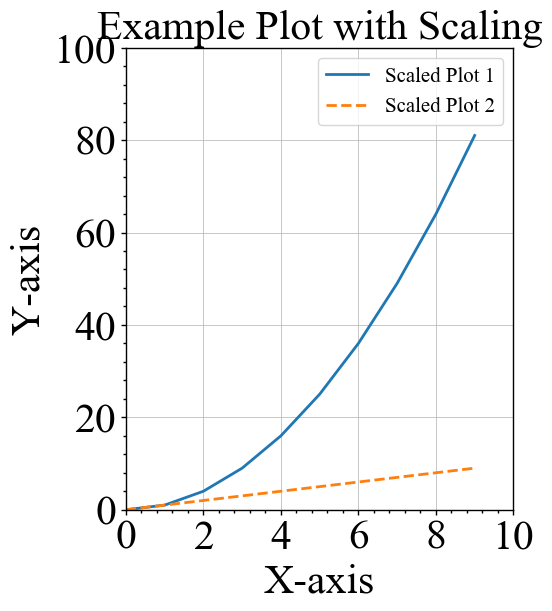

In [2]:
from matplotlib import rcdefaults
from matplotlib.ticker import MultipleLocator

# Retrieve the default color cycle
default_colors = [color['color'] for color in plt.rcParams['axes.prop_cycle']]

# Example usage
# Rule of thumbs:
# 1. Set the limit to something like 5.0, 10.0 or 50.0, 100.0 
# 2. Set five major ticks for each axis
scaling_factor = 1.0  # scale factor of plot
font_scaling_multiplier = 3.0 # extra scaling multiplier for font
legend_font_scaling_multiplier = 0.5
line_width_scaling_multiplier = 2.0 # extra scaling multiplier for lines
x_lim = (0.0, 10.0)
x_tick_interval = 2.0   # tick interval along x
y_lim = (0.0, 100.0)
y_tick_interval = 20.0  # tick interval along y
n_minor_ticks = 4  # number of minor ticks between two major ones

# scale the matplotlib params
plot_helper.scale_matplotlib_params(scaling_factor, font_scaling_multiplier=font_scaling_multiplier,\
                        legend_font_scaling_multiplier=legend_font_scaling_multiplier,
                        line_width_scaling_multiplier=line_width_scaling_multiplier)

# Update font settings for compatibility with publishing tools like Illustrator.
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})


# Plotting
fig, ax = plt.subplots(figsize=(5*scaling_factor, 6*scaling_factor))
x = range(10)
y0 = [i**2 for i in x]
y1 = [i**1 for i in x]

ax.plot(x, y0, label="Scaled Plot 1", color=default_colors[0])
ax.plot(x, y1, linestyle="--", label="Scaled Plot 2", color=default_colors[1])
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_title("Example Plot with Scaling")

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

ax.xaxis.set_major_locator(MultipleLocator(x_tick_interval))
ax.xaxis.set_minor_locator(MultipleLocator(x_tick_interval/(n_minor_ticks+1)))
ax.yaxis.set_major_locator(MultipleLocator(y_tick_interval))
ax.yaxis.set_minor_locator(MultipleLocator(y_tick_interval/(n_minor_ticks+1)))

ax.grid()

ax.legend()

# Adjust spine thickness for this plot
for spine in ax.spines.values():
    spine.set_linewidth(0.5 * scaling_factor * line_width_scaling_multiplier)

# Reset rcParams to defaults

rcdefaults()

### Example: Plot Linear Results From ASPECT

In [3]:
case_dir = os.path.join(test_fixture_path, "aspect_case_examples/case_2d_subduction")

#### **Generating Statistical Plots for ASPECT Case Outputs**

This section demonstrates the process of generating statistical plots from an output file produced by an ASPECT simulation. The example focuses on a 2D subduction case, where the simulation statistics are analyzed and visualized.



##### **Key Features of the Generated Plots**

- The function parses key metrics from the simulation statistics file and creates individual plots for various metrics, such as:
  - Time step number over time.
  - Degrees of freedom over time.
  - Nonlinear iterations over time.
  - Temperature metrics over time.
  - Velocity metrics (RMS and Max velocity) over time.

- The **Time Step Number** is annotated on each plot for easy interpretation of specific points in the simulation timeline.

---

##### **Purpose**

These visualizations provide an intuitive way to analyze the performance and results of the ASPECT simulation. By generating and saving these plots programmatically, the workflow ensures consistency and reproducibility, making it easier to assess simulation behavior and identify trends.
🚀📊

In [4]:
file_path = os.path.join(case_dir, "output/statistics_long_example")

output_dir = os.path.join(result_path, "statistic.png")

if os.path.isdir(output_dir):
    rmtree(output_dir)

plot_helper.generate_statistic_plots(file_path, output_dir=output_dir, annotate_column="Time step number")

Statistic plots have been saved to: /home/lochy/ASPECT_PROJECT/HaMaGeoLib/notebooks/examples/results/statistic.png


In [5]:
from utils.case_options import parse_log_file_for_solver_info

# todo_solver
file_path = os.path.join(case_dir, "output/log.txt")
output_path = os.path.join(result_path, "parse_solver_output.txt")
assert(os.path.isfile(file_path))

parse_log_file_for_solver_info(file_path, output_path)
print(output_path) # debug
plot_helper.generate_solver_plot_history(output_path)

/home/lochy/ASPECT_PROJECT/HaMaGeoLib/notebooks/examples/results/parse_solver_output.txt


### Example: Manipulating Outputs From Paraview

This script demonstrates the process of image manipulation and overlay using `plot_helper` and the `IPython.display` module. The workflow involves converting an EPS file to PDF, extracting an image of specific dimensions from the PDF, and overlaying it with another image on a blank canvas. The resulting combined image is then displayed in the notebook.

#### Workflow Steps

1. **Input Validation:**
   - Paths to required input files (`EPS` and `PNG`) are defined and their existence is asserted.

2. **Output Preparation:**
   - Paths to output files (`PDF` and combined image `PNG`) are defined.
   - Any existing files are removed to ensure clean processing.

3. **Image Conversion:**
   - Convert the `EPS` file to `PDF` using the `plot_helper.convert_eps_to_pdf()` function.

4. **Image Extraction:**
   - Extract an image with specific dimensions from the `PDF` file using `plot_helper.extract_image_by_size()`.
   - Optionally crop the image using a defined crop box.

5. **Image Overlay:**
   - Overlay two images on a blank canvas using `plot_helper.overlay_images_on_blank_canvas()`.
   - Specify canvas size, image positions, optional cropping regions, and scaling factors for each image.
   - Add a text of the model time

6. **Display Result:**
   - The final combined image is displayed in the notebook using `IPython.display.Image`.

## Key Parameters

- **Target Size:** The desired dimensions of th. It must be specified to be the exact size of the paraview output. If you do "start trace" in Paraview and save your figure. The Script Editor will show this option in the "SetSize" options. Otherwise, query the generated file directly.


Successfully converted /home/lochy/ASPECT_PROJECT/HaMaGeoLib/tests/integration/fixtures/plot_exmaples/t8ma_exported.eps to /home/lochy/ASPECT_PROJECT/HaMaGeoLib/notebooks/examples/results/t8ma_converted.pdf
Found 3 image(s) on the page.
Found matching image with dimensions: 1350x704
Saved the full figure as /home/lochy/ASPECT_PROJECT/HaMaGeoLib/notebooks/examples/results/real_figure.png
Original size of image 1: (1350, 704)
Cropped size of image 1: (1350, 704)
Scaled size of image 1: (1627, 848)
Original size of image 2: (1700, 800)
Cropped size of image 2: (1700, 800)
Overlay completed. Final image saved as /home/lochy/ASPECT_PROJECT/HaMaGeoLib/notebooks/examples/results/combined_image.png
Image saved to /home/lochy/ASPECT_PROJECT/HaMaGeoLib/notebooks/examples/results/combined_image.png


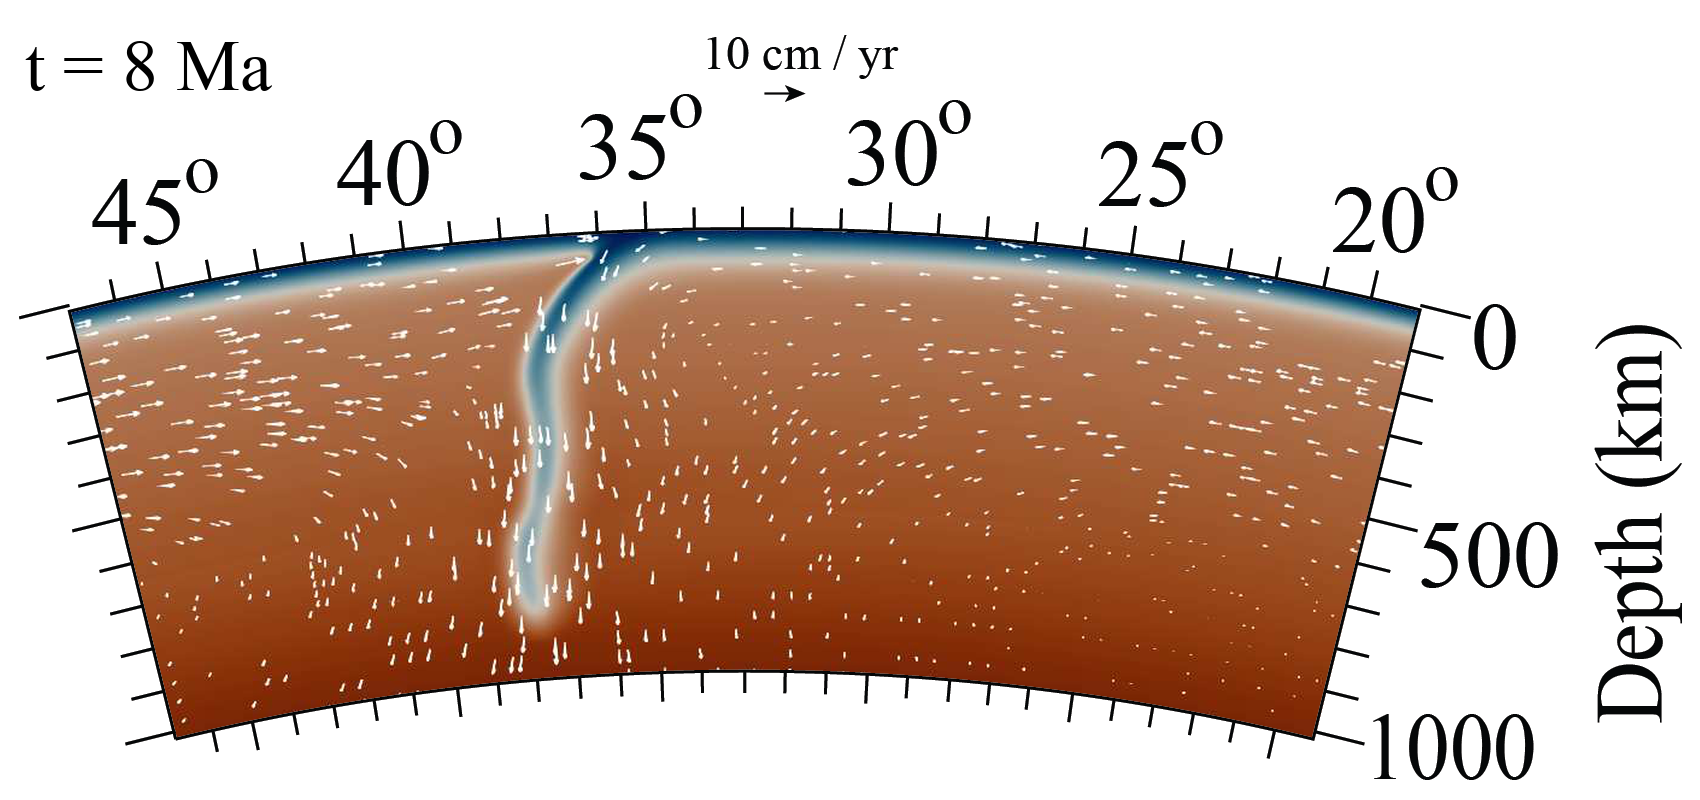

In [6]:
from IPython.display import Image, display
import os

# Inputs
# Paths to input files
eps_file = os.path.join(test_fixture_path, "plot_exmaples", "t8ma_exported.eps")
frame_png_file_with_ticks = os.path.join(test_fixture_path, "plot_exmaples", "upper_mantle_frame_03132024_trans_with_frame-01.png")

# Ensure input files exist
assert(os.path.isfile(eps_file))
assert(os.path.isfile(frame_png_file_with_ticks))

# Outputs
# Paths to output files
pdf_file = os.path.join(result_path, "t8ma_converted.pdf")
if os.path.isfile(pdf_file):
    # Remove existing PDF file to ensure a clean conversion
    os.remove(pdf_file)

output_image_file = os.path.join(result_path, "combined_image.png")
if os.path.isfile(output_image_file):
    # Remove existing output image to ensure a clean overlay
    os.remove(output_image_file)

# Example usage, convert_eps_to_pdf
# Converts an EPS file to a PDF format using the plot_helper module.
plot_helper.convert_eps_to_pdf(eps_file, pdf_file)

# Example usage, extract_image_by_size
# Extracts an image from a PDF file with specific dimensions and an optional crop box.
target_size = (1350, 704)  # Desired image dimensions in pixels
crop_box = (200, 100, 1000, 700)  # Optional crop box to define the region of interest

full_image_path = plot_helper.extract_image_by_size(pdf_file, target_size, result_path, crop_box)

# Example usage, overlay_images_on_blank_canvas
# Overlays multiple images on a blank canvas with specified sizes, positions, cropping, and scaling.
plot_helper.overlay_images_on_blank_canvas(
    canvas_size=(1700, 800),  # Size of the blank canvas in pixels (width, height)
    image_files=[full_image_path, frame_png_file_with_ticks],  # List of image file paths to overlay
    image_positions=[(-75, 64), (0, 0)],  # Positions of each image on the canvas
    cropping_regions=[None, None],  # Optional cropping regions for the images
    image_scale_factors=[1.20518518519, None],  # Scaling factors for resizing the images
    output_image_file=output_image_file  # Path to save the final combined image
)

# Example Usage, add_text_to_image
# image_path = "your_image.png"  # Replace with the path to your PNG file
# output_path = "output_image_with_text.png"  # Path to save the output image
text = "t = 8 Ma"  # Replace with the text you want to add
position = (25, 25)  # Replace with the desired text position (x, y)
font_path = "/usr/share/fonts/truetype/msttcorefonts/times.ttf"  # Path to Times New Roman font
font_size = 72

plot_helper.add_text_to_image(output_image_file, output_image_file, text, position, font_path, font_size)

# Displays the final combined image in the notebook.
display(Image(filename=output_image_file))